In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
new_df=df.copy()

In [9]:
new_df.drop(["CustomerID"],axis=1,inplace=True)
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

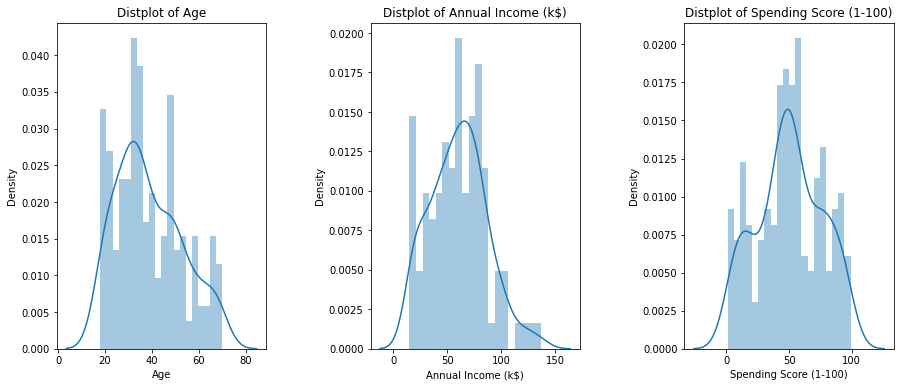

In [10]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age',	'Annual Income (k$)',	'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(new_df[x],bins=20)
  plt.title('Distplot of {}'.format(x))
plt.show()  

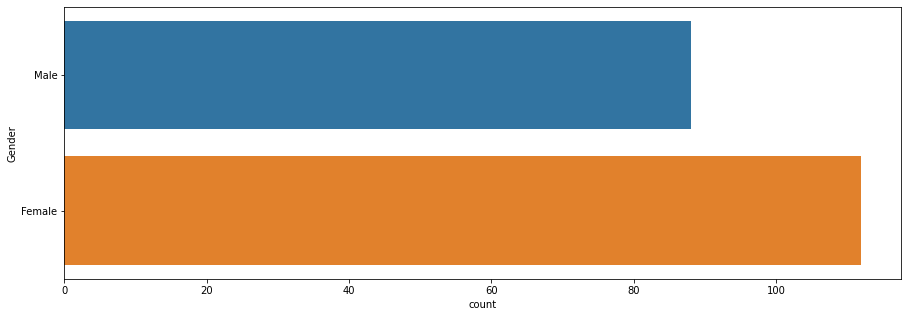

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=new_df)
plt.show()

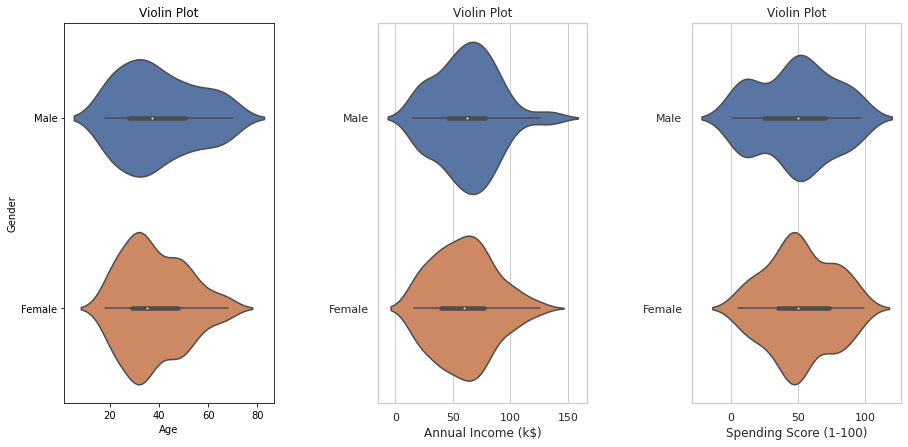

In [12]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age',	'Annual Income (k$)',	'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols,y='Gender', data=new_df)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin Plot')
plt.show()  

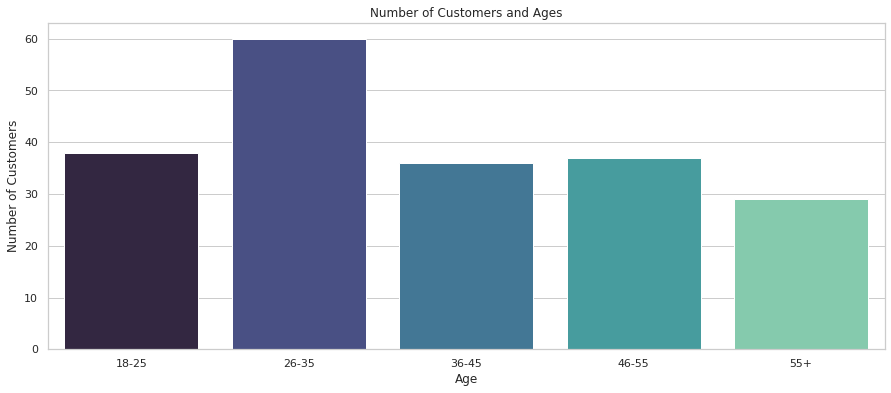

In [15]:
age_18_25=new_df.Age[(new_df.Age>=18) & (new_df.Age<=25)]
age_26_35=new_df.Age[(new_df.Age>=26) & (new_df.Age<=35)]
age_36_45=new_df.Age[(new_df.Age>=36) & (new_df.Age<=45)]
age_46_55=new_df.Age[(new_df.Age>=46) & (new_df.Age<=55)]
age_55above=new_df.Age[(new_df.Age>=56)]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey,palette="mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

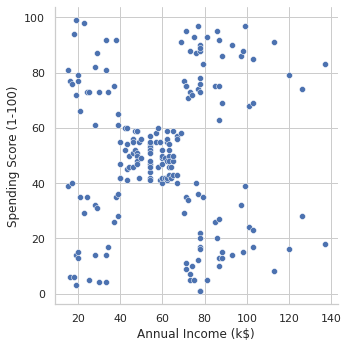

In [17]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=new_df)

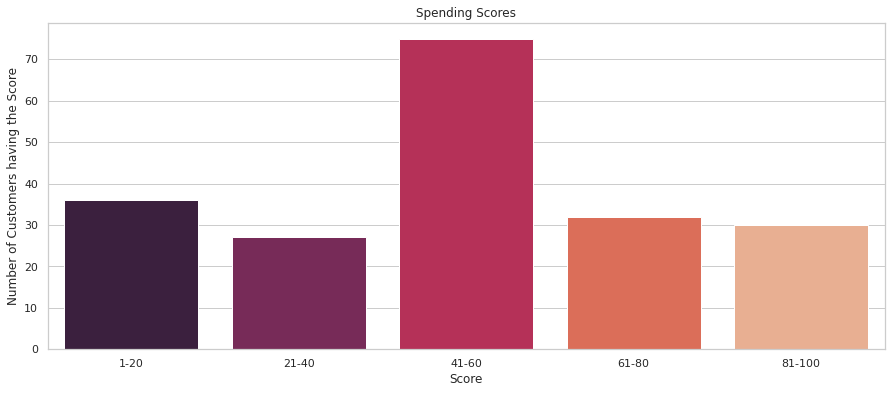

In [18]:
ss_1_20=new_df["Spending Score (1-100)"][(new_df["Spending Score (1-100)"]>=1) & (new_df["Spending Score (1-100)"]<=20)]
ss_21_40=new_df["Spending Score (1-100)"][(new_df["Spending Score (1-100)"]>=21) & (new_df["Spending Score (1-100)"]<=40)]
ss_41_60=new_df["Spending Score (1-100)"][(new_df["Spending Score (1-100)"]>=41) & (new_df["Spending Score (1-100)"]<=60)]
ss_61_80=new_df["Spending Score (1-100)"][(new_df["Spending Score (1-100)"]>=61) & (new_df["Spending Score (1-100)"]<=80)]
ss_81_100=new_df["Spending Score (1-100)"][(new_df["Spending Score (1-100)"]>=81) & (new_df["Spending Score (1-100)"]<=100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the Score")
plt.show()

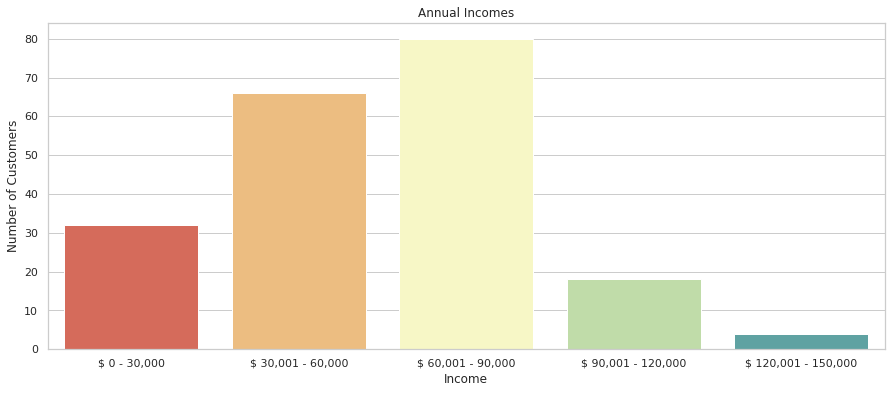

In [19]:
ai0_30=new_df["Annual Income (k$)"][(new_df["Annual Income (k$)"]>=0) & (new_df["Annual Income (k$)"]<=30)]
ai31_60=new_df["Annual Income (k$)"][(new_df["Annual Income (k$)"]>=31) & (new_df["Annual Income (k$)"]<=60)]
ai61_90=new_df["Annual Income (k$)"][(new_df["Annual Income (k$)"]>=61) & (new_df["Annual Income (k$)"]<=90)]
ai91_120=new_df["Annual Income (k$)"][(new_df["Annual Income (k$)"]>=91) & (new_df["Annual Income (k$)"]<=120)]
ai121_150=new_df["Annual Income (k$)"][(new_df["Annual Income (k$)"]>=121) & (new_df["Annual Income (k$)"]<=150)]

aix=["$ 0 - 30,000","$ 30,001 - 60,000","$ 60,001 - 90,000","$ 90,001 - 120,000","$ 120,001 - 150,000"]
aiy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

In [35]:
x1=new_df.loc[:, ["Age","Spending Score (1-100)"]].values
x2=new_df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
x3=new_df.iloc[:,1:]

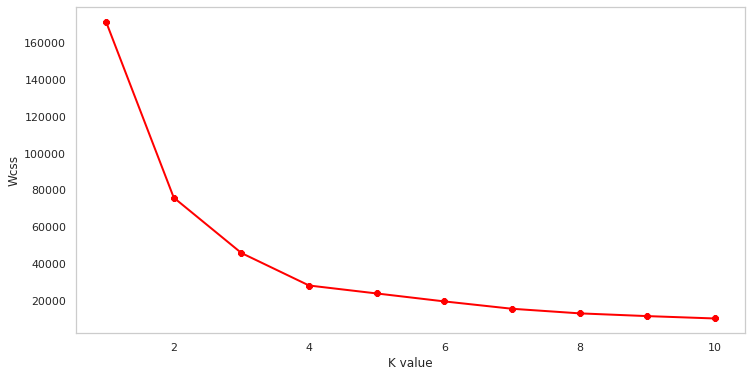

In [22]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("Wcss")
plt.show()  

In [25]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)

label

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [26]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


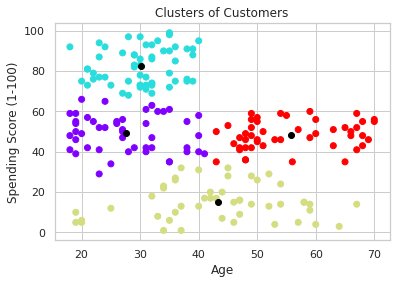

In [28]:
plt.scatter(x1[:,0] , x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

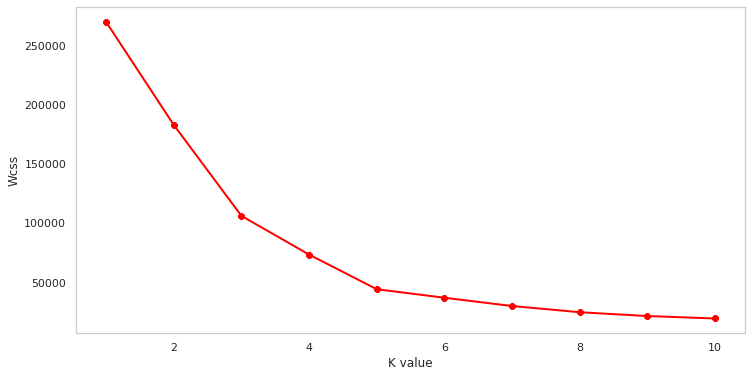

In [30]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("Wcss")
plt.show()  

In [32]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)

label

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [33]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


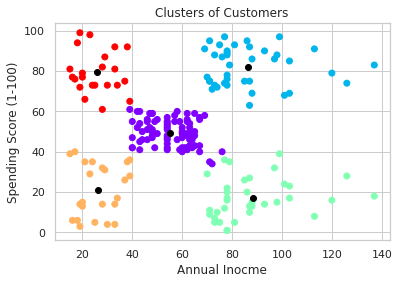

In [34]:
plt.scatter(x2[:,0] , x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Inocme')
plt.ylabel('Spending Score (1-100)')
plt.show()

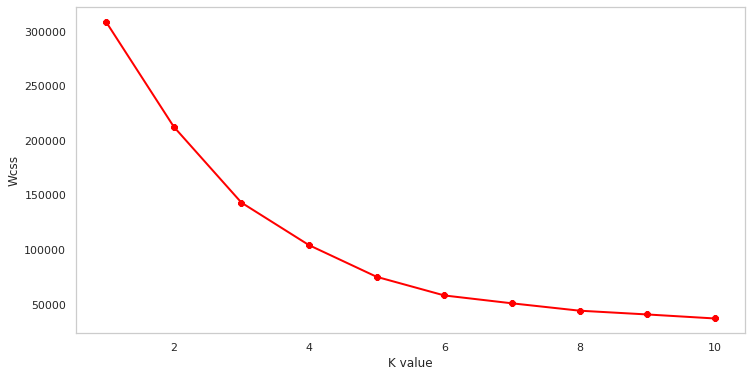

In [36]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("Wcss")
plt.show() 

In [41]:
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x3)
new_df["label"]=clusters

In [38]:
print(kmeans.cluster_centers_)

[[40.32432432 87.43243243 18.18918919]
 [43.12658228 54.82278481 49.83544304]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [25.27272727 25.72727273 79.36363636]]


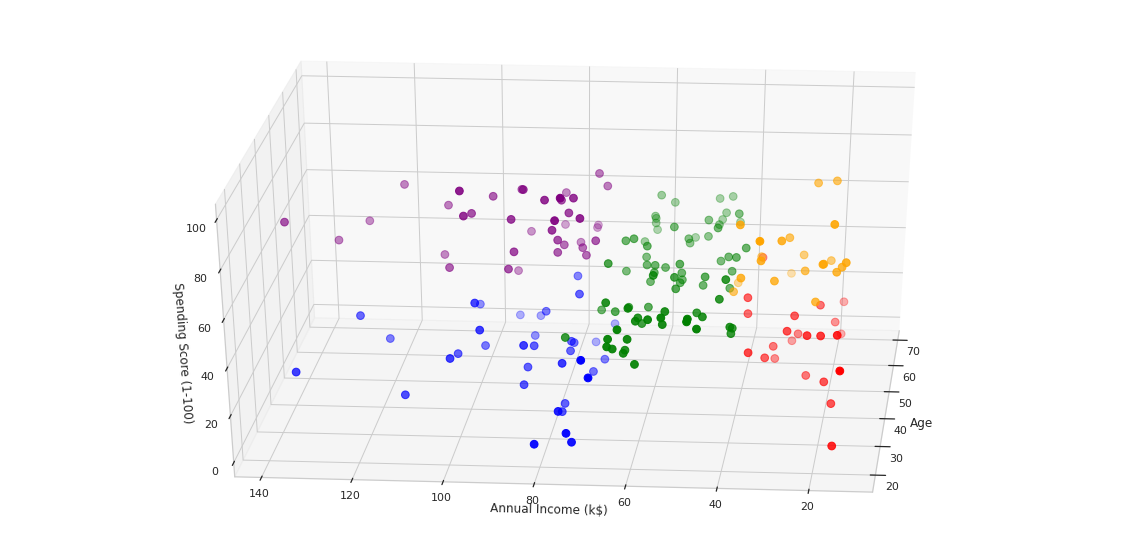

In [42]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new_df.Age[new_df.label==0],new_df["Annual Income (k$)"][new_df.label==0],new_df["Spending Score (1-100)"][new_df.label==0],c='blue',s=60)
ax.scatter(new_df.Age[new_df.label==1],new_df["Annual Income (k$)"][new_df.label==1],new_df["Spending Score (1-100)"][new_df.label==1],c='red',s=60)
ax.scatter(new_df.Age[new_df.label==2],new_df["Annual Income (k$)"][new_df.label==2],new_df["Spending Score (1-100)"][new_df.label==2],c='green',s=60)
ax.scatter(new_df.Age[new_df.label==3],new_df["Annual Income (k$)"][new_df.label==3],new_df["Spending Score (1-100)"][new_df.label==3],c='orange',s=60)
ax.scatter(new_df.Age[new_df.label==4],new_df["Annual Income (k$)"][new_df.label==4],new_df["Spending Score (1-100)"][new_df.label==4],c='purple',s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()